In [5]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse455/assignments/assignment3/'
FOLDERNAME = 'cse455/assignments/assignment3_colab/assignment3_colab/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cse455/assignments/assignment3_colab/assignment3_colab


# Clustering and Segmentation
*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment covers K-Means and HAC methods for clustering and image segmentation.

In [6]:
# Setup
from __future__ import print_function
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction
In this assignment, you will use clustering algorithms to segment images. You will then use these segmentations to identify foreground and background objects.

Your assignment will involve the following subtasks:
- **Clustering algorithms**: Implement K-Means clustering and Hierarchical Agglomerative Clustering.
- **Pixel-level features**: Implement a feature vector that combines color and position information and implement feature normalization.
- **Quantitative Evaluation**: Evaluate segmentation algorithms with a variety of parameter settings by comparing your computed segmentations against a dataset of ground-truth segmentations.

## 1 Clustering Algorithms (40 points)

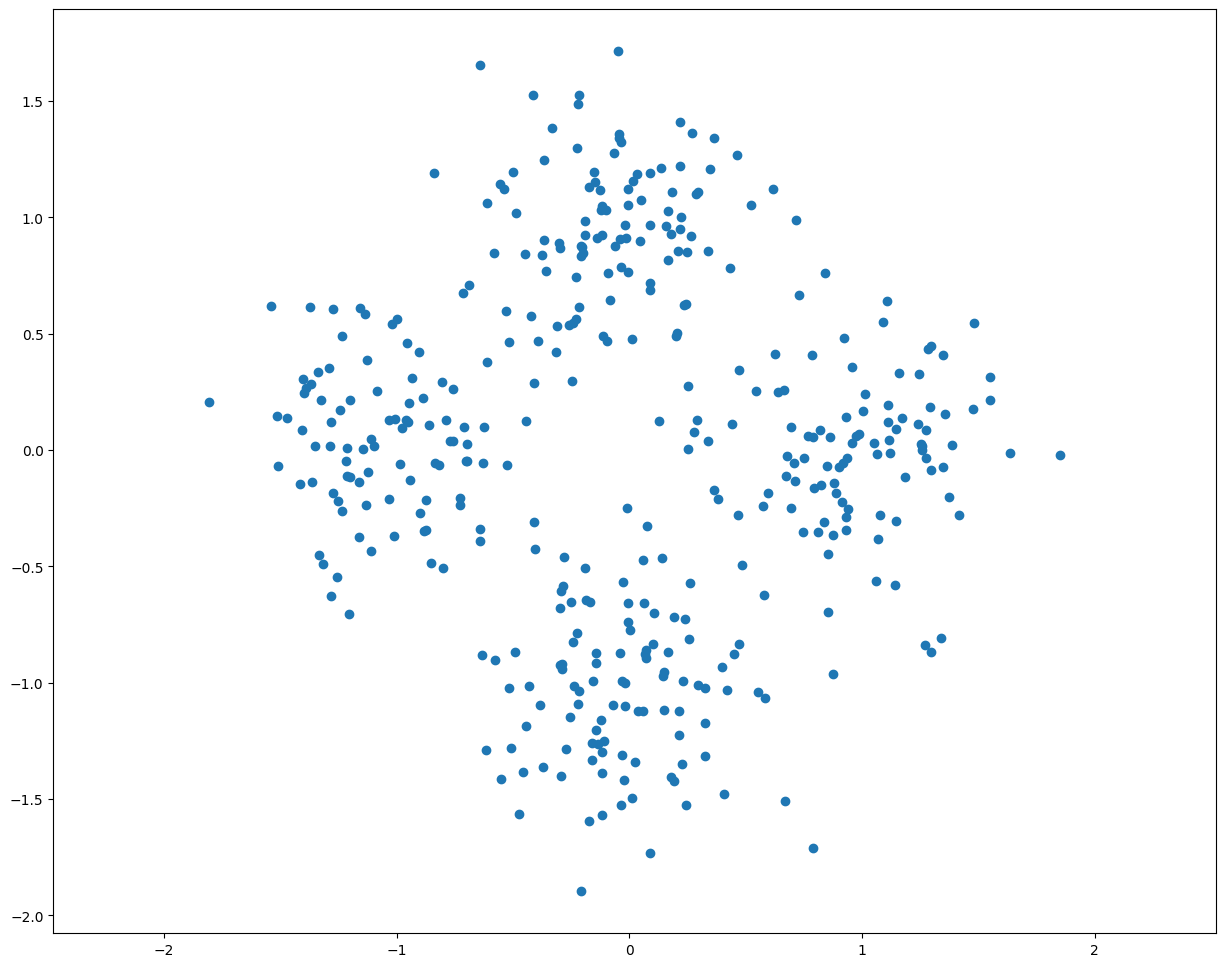

In [7]:
# Generate random data points for clustering

# Set seed for consistency
np.random.seed(0)

# Cluster 1
mean1 = [-1, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [0, 1]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)

# Cluster 3
mean3 = [1, 0]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, 100)

# Cluster 4
mean4 = [0, -1]
cov4 = [[0.1, 0], [0, 0.1]]
X4 = np.random.multivariate_normal(mean4, cov4, 100)

# Merge two sets of data points
X = np.concatenate((X1, X2, X3, X4))

# Plot data points
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

### 1.1 K-Means Clustering (20 points)
As discussed in class, K-Means is one of the most popular clustering algorithms. We have provided skeleton code for K-Means clustering in the file `segmentation.py`. Your first task is to finish implementing **`kmeans`** in `segmentation.py`. This version uses nested for loops to assign points to the closest centroid and compute a new mean for each cluster.

kmeans running time: 0.057544 seconds.


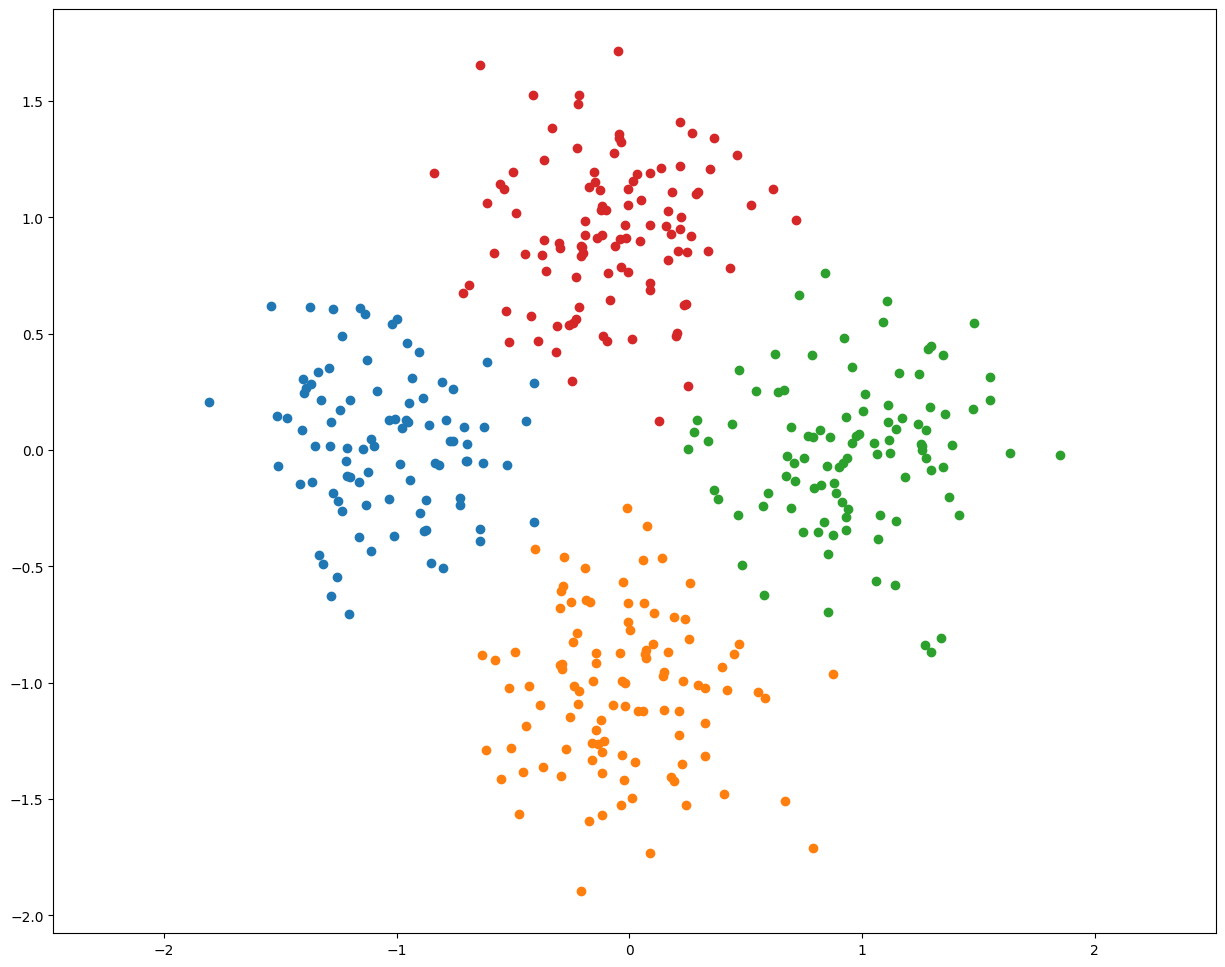

In [8]:
from segmentation import kmeans

np.random.seed(0)
start = time()
assignments = kmeans(X, 4)
end = time()

kmeans_runtime = end - start

print("kmeans running time: %f seconds." % kmeans_runtime)

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

We can use numpy functions and broadcasting to make K-Means faster. Implement **`kmeans_fast`** in `segmentation.py`. This should run at least 10 times faster than the previous implementation.

kmeans running time: 0.001776 seconds.
32.396779 times faster!


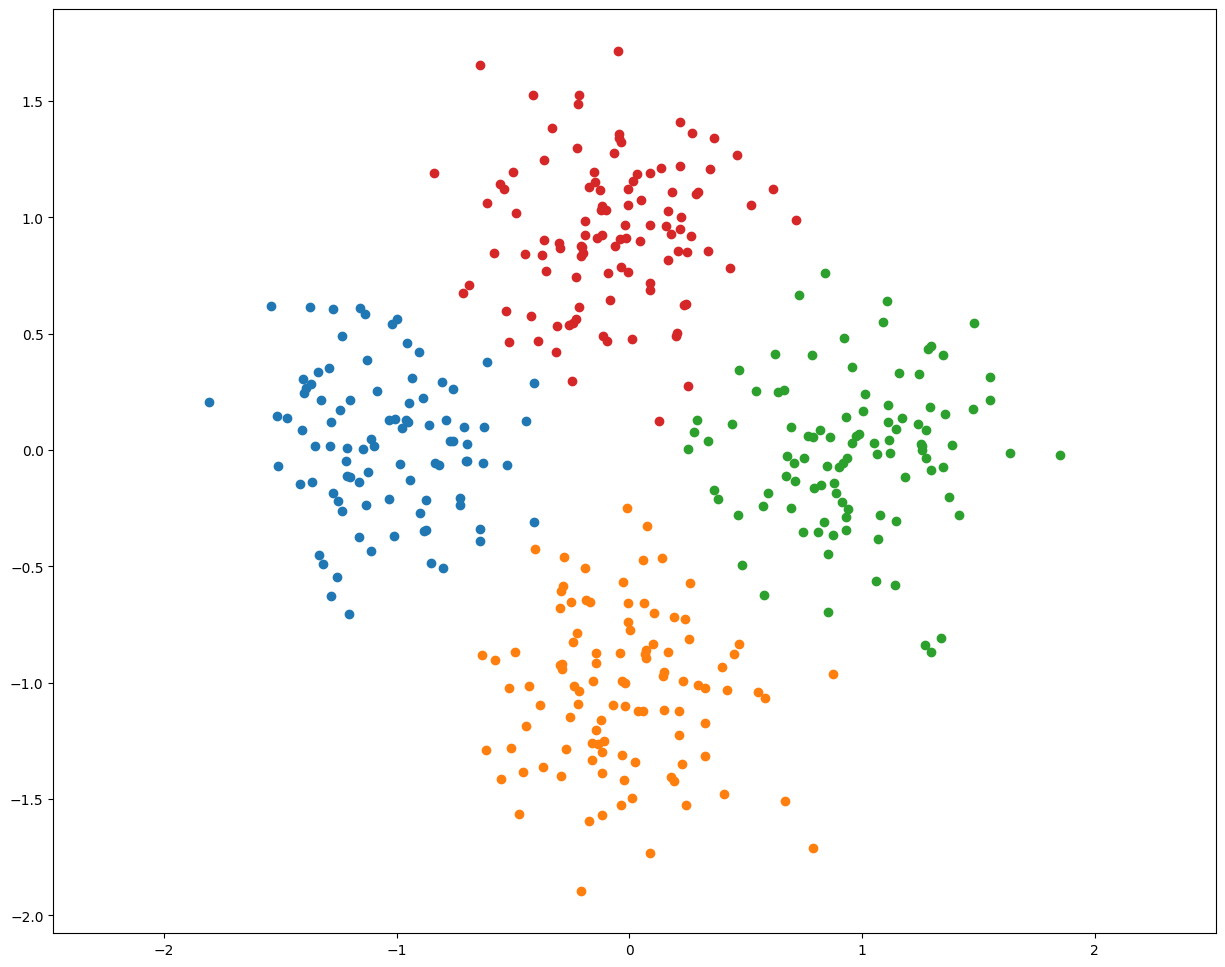

In [9]:
from segmentation import kmeans_fast

np.random.seed(0)
start = time()
assignments = kmeans_fast(X, 4)
end = time()

kmeans_fast_runtime = end - start
print("kmeans running time: %f seconds." % kmeans_fast_runtime)
print("%f times faster!" % (kmeans_runtime / kmeans_fast_runtime))

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

### 1.2 K-Means Convergence (10 points)
Implementations of the K-Means algorithm will often have the parameter `num_iters` to define the maximum number of iterations the algorithm should run for. Consider that we opt to not include this upper bound on the number of iterations, and that we define the termination criterion of the algorithm to be when the cost $L$ stops changing.

Recall that $L$ is defined as the sum of squared distance between all points $x$ and their nearest cluster center $c$:

$$L = \sum_{i \in clusters}\sum_{x \in cluster_i} (x - c_i)^2$$

Show that for any set of points **$D$** and any number of clusters $k$, the K-Means algorithm will terminate in a finite number of iterations.

**Your answer here:**

Direct Proof.

Suppose we have $n$ points and $k$ clusters. Each point can be assigned to one of the $k$ clusters, so there are at most $k^n$ (a finite number) different assignments in the dataset.

Note, the objective function of K-means $L$ is monotonically decreasing, meaning $L$ never increases (only stays the same or decreases), and if the assignment of the points change, L decreases by some positive amount.

Since $L$ is the sum of squared distances, it is bounded below by 0. Therefore, it cannot decrease forever. Given that there are a finitel number of possible assignments ($k^n$) and $L$ is strictly decreasing whenever the assignment changes, the algorithm cannot keep producing new assignments forever.

This means, at some point, $L$ will not change relative to the previous iteration, and consequently, the algorithm will terminate.

### 1.2 Hierarchical Agglomerative Clustering (10 points)
Another simple clustering algorithm is Hieararchical Agglomerative Clustering, which is somtimes abbreviated as HAC. In this algorithm, each point is initially assigned to its own cluster. Then cluster pairs are merged until we are left with the desired number of predetermined clusters (see Algorithm 1).

Implement **`hiererachical_clustering`** in `segmentation.py`.

![algo1.png](https://drive.google.com/uc?export=view&id=1M44zSVSpyM0C6KM-dc1B_6cnrpX-zYEg)

hierarchical_clustering running time: 0.800552 seconds.


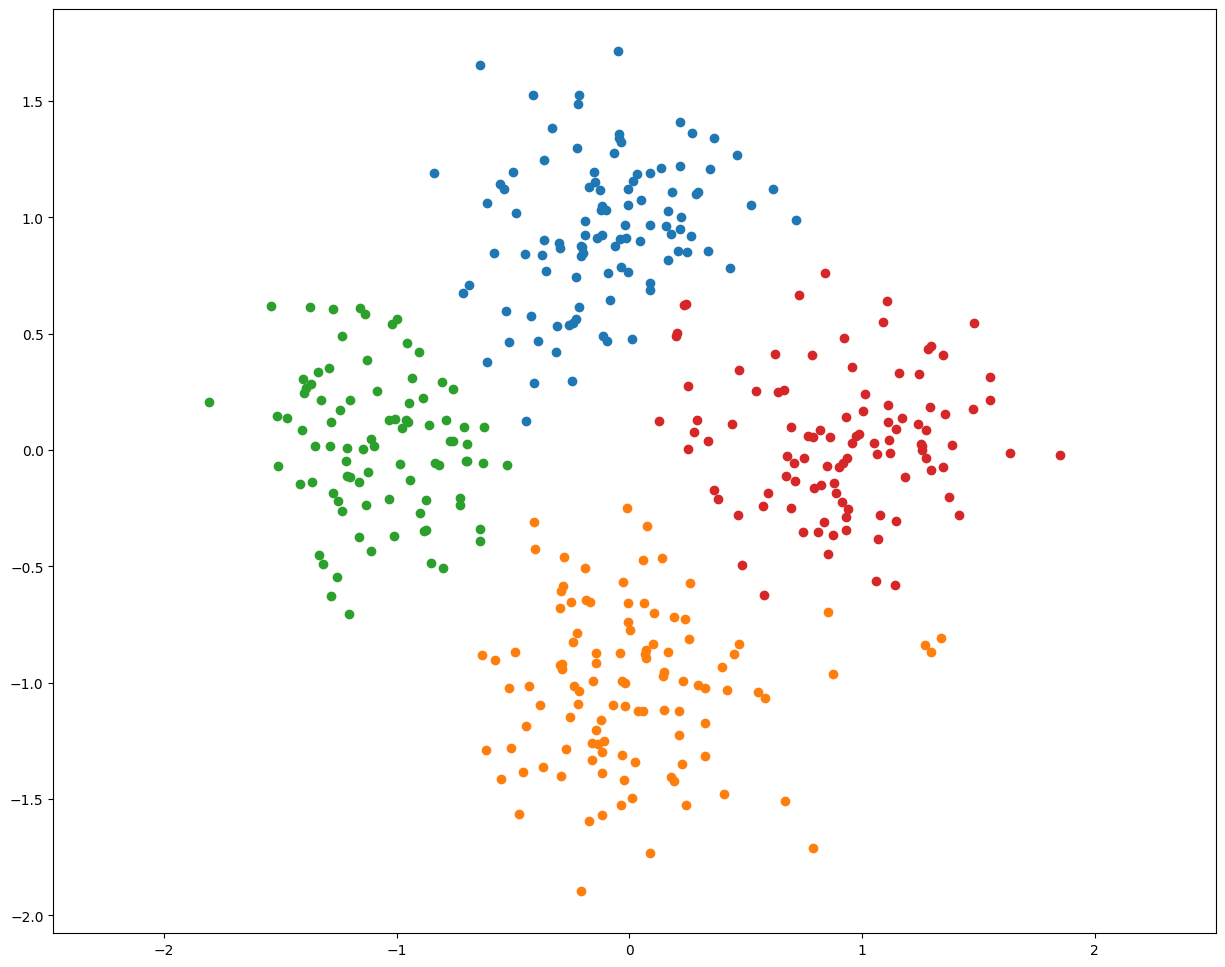

In [10]:
from segmentation import hierarchical_clustering

start = time()
assignments = hierarchical_clustering(X, 4)
end = time()

print("hierarchical_clustering running time: %f seconds." % (end - start))

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

## 2 Pixel-Level Features (30 points)
Before we can use a clustering algorithm to segment an image, we must compute some *feature vector* for each pixel. The feature vector for each pixel should encode the qualities that we care about in a good segmentation. More concretely, for a pair of pixels $p_i$ and $p_j$ with corresponding feature vectors $f_i$ and $f_j$, the distance between $f_i$ and $f_j$ should be small if we believe that $p_i$ and $p_j$ should be placed in the same segment and large otherwise.

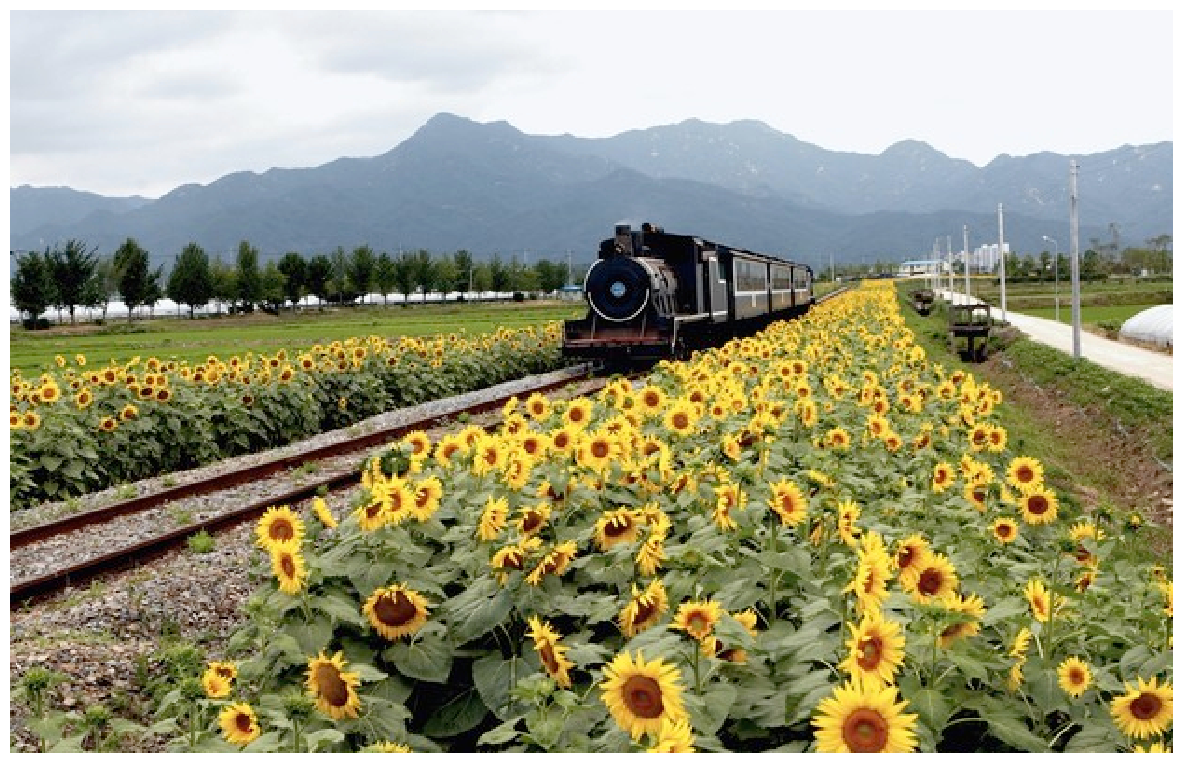

In [11]:
# Load and display image
img = io.imread('train.jpg')
H, W, C = img.shape

plt.imshow(img)
plt.axis('off')
plt.show()

### 2.1 Color Features (15 points)
One of the simplest possible feature vectors for a pixel is simply the vector of colors for that pixel. Implement **`color_features`** in `segmentation.py`. Output should look like the following:
![color_features.png](https://drive.google.com/uc?export=view&id=15SXKZjfxUq4jGXmPztw7KGCuav1BqdFp)

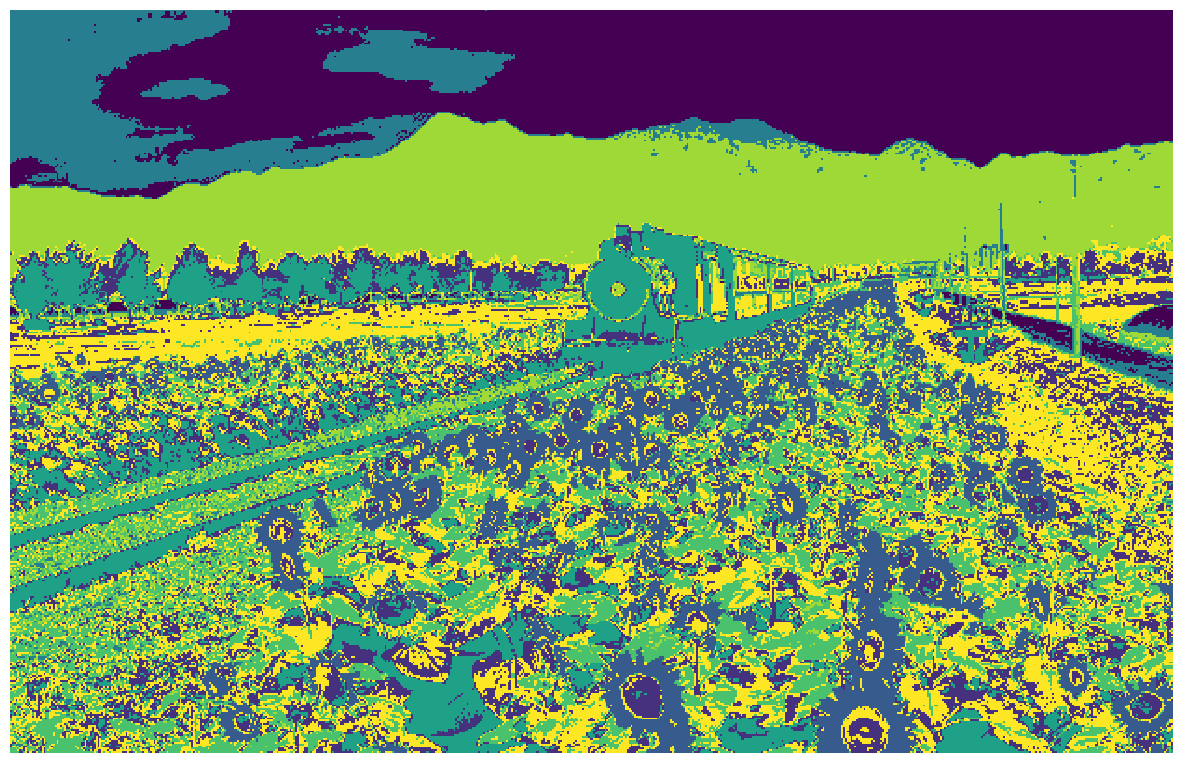

In [12]:
from segmentation import color_features
np.random.seed(0)

features = color_features(img)

# Sanity checks
assert features.shape == (H * W, C),\
    "Incorrect shape! Check your implementation."

assert features.dtype == np.float64,\
    "dtype of color_features should be float."

assignments = kmeans_fast(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

In the cell below, we visualize each segment as the mean color of pixels in the segment.

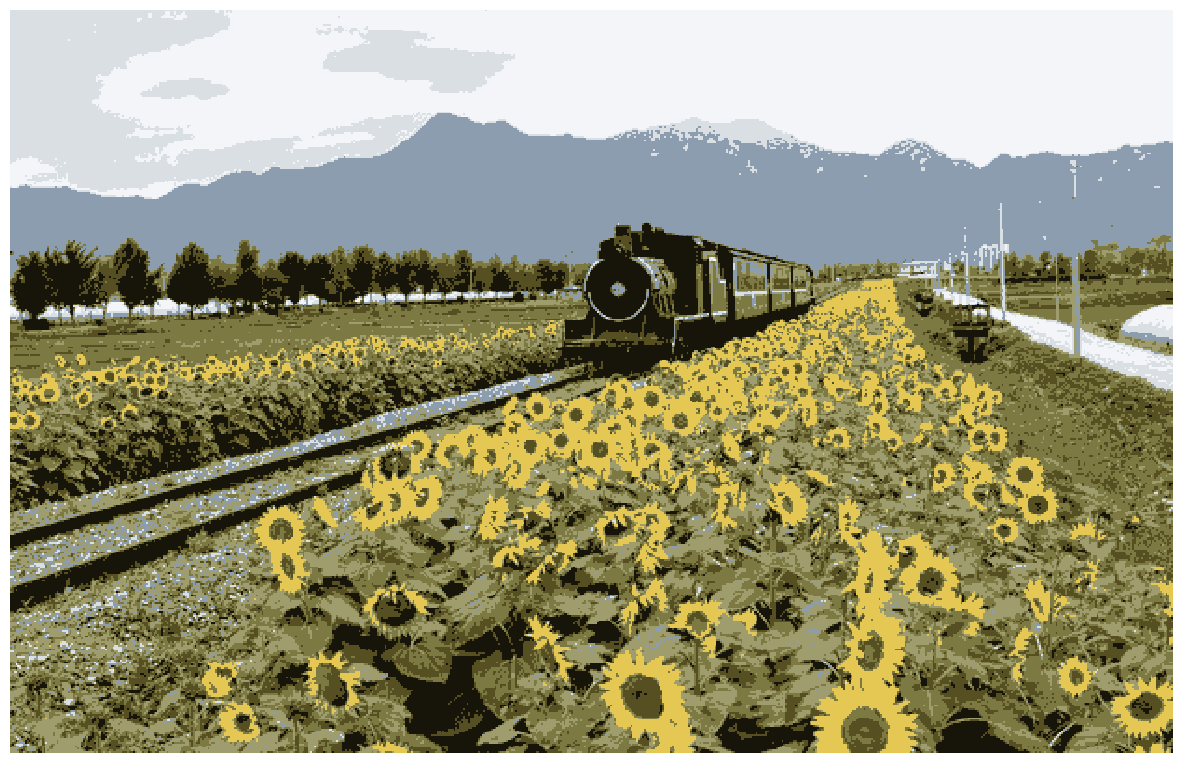

In [13]:
from utils import visualize_mean_color_image
visualize_mean_color_image(img, segments)

### 2.2 Color and Position Features (15 points)
Another simple feature vector for a pixel is to concatenate its color and position within the image. In other words, for a pixel of color $(r, g, b)$ located at position $(x, y)$ in the image, its feature vector would be $(r, g, b, x, y)$. However, the color and position features may have drastically different ranges; for example each color channel of an image may be in the range $[0, 1)$, while the position of each pixel may have a much wider range. Uneven scaling between different features in the feature vector may cause clustering algorithms to behave poorly.

One way to correct for uneven scaling between different features is to apply some sort of normalization to the feature vector. One of the simplest types of normalization is to force each feature to have zero mean and unit variance.

Implement **`color_position_features`** in `segmentation.py`.

Output segmentation should look like the following:
![color_position_features.png](https://drive.google.com/uc?export=view&id=1reJv9E6MkR7YE2h-i0QSx2Ulwh-nDQ3f)

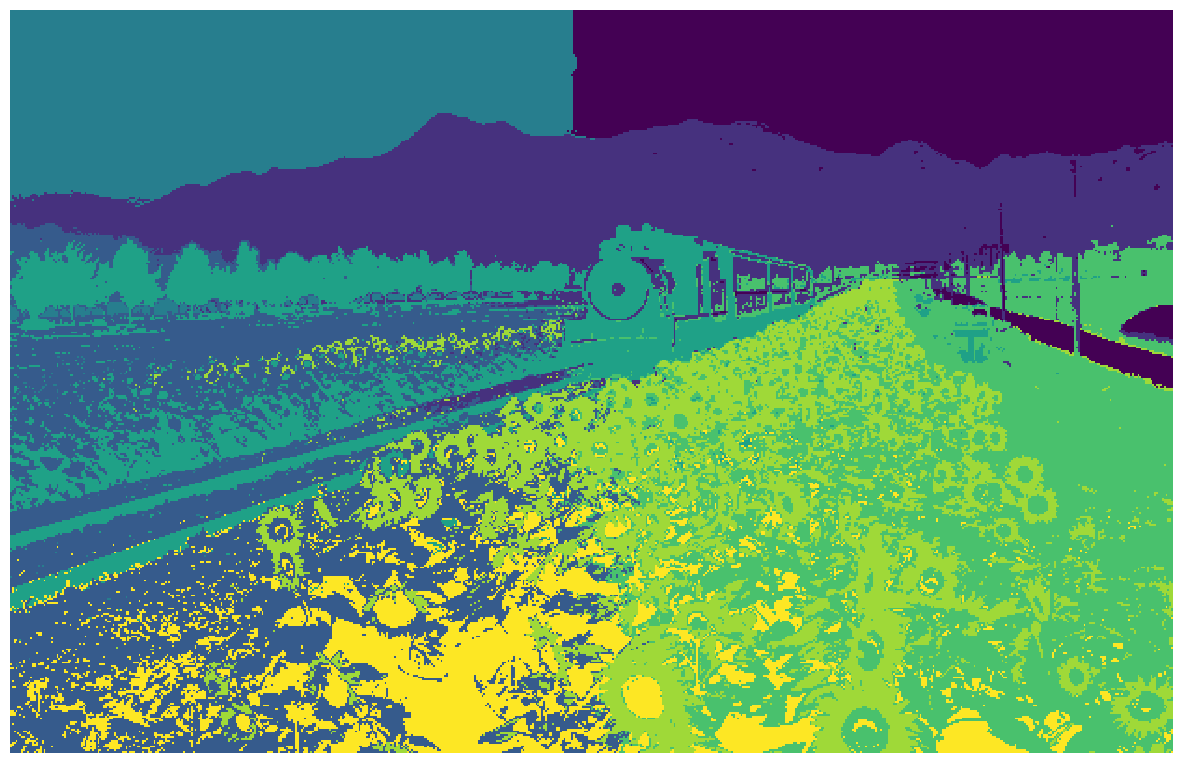

In [14]:
from segmentation import color_position_features
np.random.seed(0)

features = color_position_features(img)

# Sanity checks
assert features.shape == (H * W, C + 2),\
    "Incorrect shape! Check your implementation."

assert features.dtype == np.float64,\
    "dtype of color_features should be float."

assignments = kmeans_fast(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

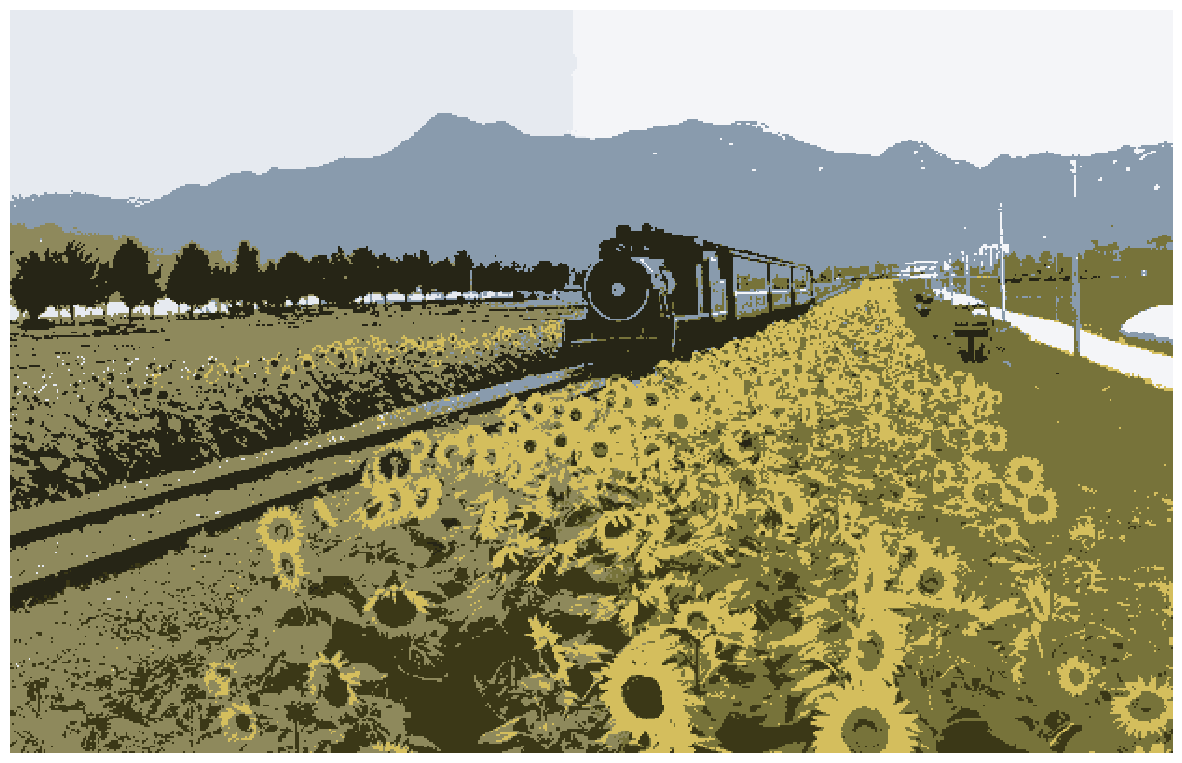

In [15]:
visualize_mean_color_image(img, segments)

### Extra Credit: Implement Your Own Feature
For this programming assignment we have asked you to implement a very simple feature transform for each pixel. While it is not required, you should feel free to experiment with other feature transforms. Could your final segmentations be improved by adding gradients, edges, SIFT descriptors, or other information to your feature vectors? Could a different type of normalization give better results?

Implement your feature extractor **`my_features`** in `segmentation.py`

Depending on the creativity of your approach and the quality of your writeup, implementing extra feature vectors can be worth extra credit (up to 1% of final grade).

**Describe your approach**: (YOUR APPROACH)

To improve segmentation from the previous iterations, I chose to incorporate edge and corner information alongside color and spatial position into the feature representation.

**Color Information (RGB):** Self-explanatory - color is a key factor in distinguishing different objects and regions in an image.

**Spatial Information (x,y):** Also, straightforward - coordinates promote more spatial coherence, which means neighboring pixels are more likely to be assigned to the same cluster.

**Edge/corner Information:** Here, I tried multiple edge detection filters including **Sobel**, **Canny**, and others I found online. For corners, I tried the **Harris** corner detector discussed in class as well as the **Shi-Tomasi** corner detector. The reasoning behind this was to simply have a more refined representation of object boundaries and capture strucutral features. Altogether, I tried various combinations of using only edge detectors, only corner detectors, and both edge and corner detectors. Ultimately, in my opinion, the best result was from using **Canny** and **Harris** and a close second would be just using **Canny**. One could argue the image is a bit oversegmented, but I think that is bound to happen given that the image has "high energy" or gradients all over.

Finally, as mentioned in the previous problem, I just used the standard normalization (zero mean and unit variance) for the uneven scaling between different features.

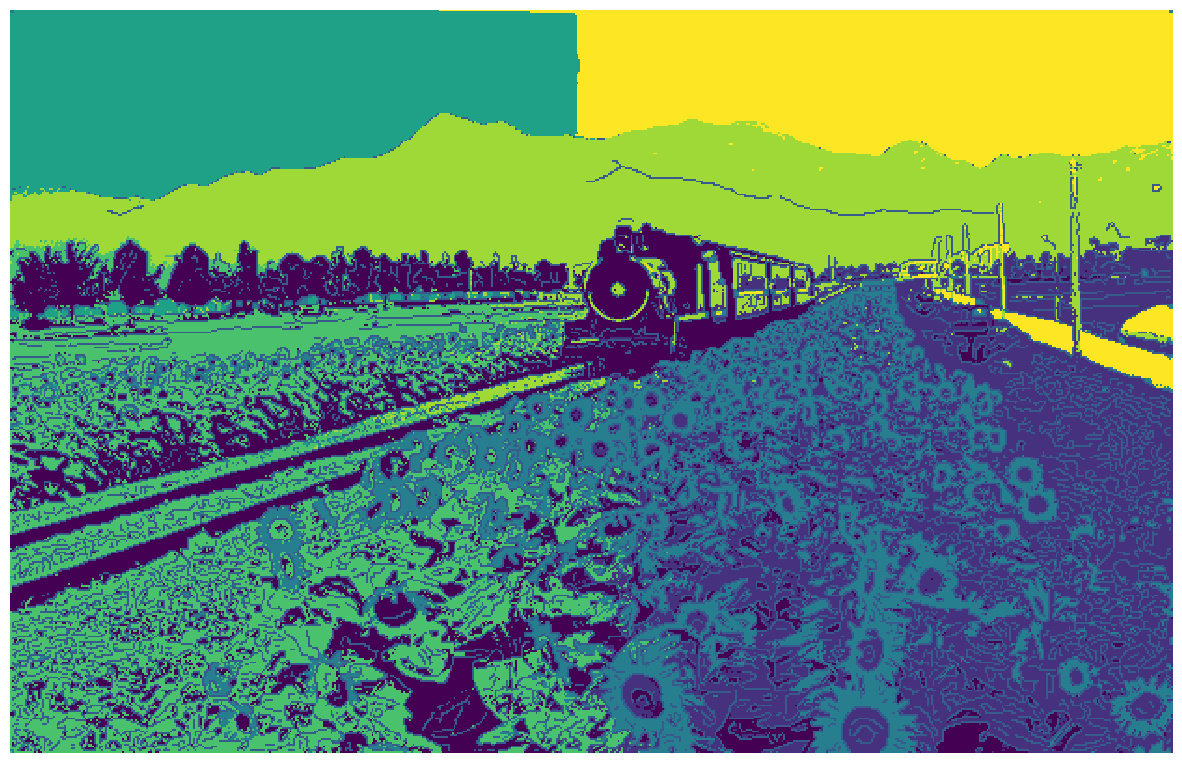

In [20]:
from segmentation import my_features

# Feel free to experiment with different images
# and varying number of segments
img = io.imread('train.jpg')
num_segments = 8

H, W, C = img.shape

# Extract pixel-level features
features = my_features(img)

# Run clustering algorithm
assignments = kmeans_fast(features, num_segments)

segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

## 3 Quantitative Evaluation (30 points)

Looking at images is a good way to get an idea for how well an algorithm is working, but the best way to evaluate an algorithm is to have some quantitative measure of its performance.

For this project we have supplied a small dataset of cat images and ground truth segmentations of these images into foreground (cats) and background (everything else). We will quantitatively evaluate different segmentation methods (features and clustering methods) on this dataset.

We can cast the segmentation task into a binary classification problem, where we need to classify each pixel in an image into either foreground (positive) or background (negative). Given the ground-truth labels, the accuracy of a segmentation is $(TP+TN)/(P+N)$.

Implement **`compute_accuracy`** in `segmentation.py`.

Accuracy: 0.97


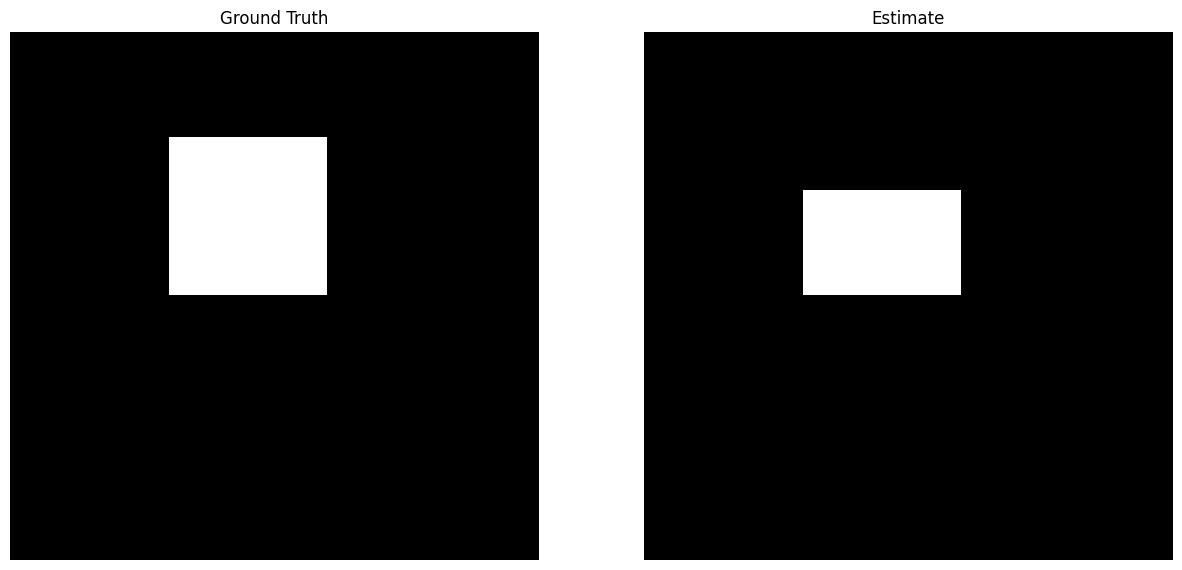

In [21]:
from segmentation import compute_accuracy

mask_gt = np.zeros((100, 100))
mask = np.zeros((100, 100))

# Test compute_accracy function
mask_gt[20:50, 30:60] = 1
mask[30:50, 30:60] = 1

accuracy = compute_accuracy(mask_gt, mask)

print('Accuracy: %0.2f' % (accuracy))
if accuracy != 0.97:
    print('Check your implementation!')

plt.subplot(121)
plt.imshow(mask_gt)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title('Estimate')
plt.axis('off')

plt.show()

You can use the script below to evaluate a segmentation method’s ability to separate foreground from background on the entire provided dataset. Use this script as a starting point to evaluate a variety of segmentation parameters.

In [22]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 3
clustering_fn = kmeans_fast
feature_fn = color_features
scale = 0.5

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)

    segmentations.append(segments)

    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)

    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy

mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

Accuracy for image 0: 0.8080
Accuracy for image 1: 0.9553
Accuracy for image 2: 0.9885
Accuracy for image 3: 0.9084
Accuracy for image 4: 0.9560
Accuracy for image 5: 0.6940
Accuracy for image 6: 0.6730
Accuracy for image 7: 0.6732
Accuracy for image 8: 0.8427
Accuracy for image 9: 0.9530
Accuracy for image 10: 0.8634
Accuracy for image 11: 0.8113
Accuracy for image 12: 0.7316
Accuracy for image 13: 0.6605
Accuracy for image 14: 0.7480
Accuracy for image 15: 0.4939
Mean accuracy: 0.7976


In [23]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 4
clustering_fn = kmeans_fast
feature_fn = color_features
scale = 0.5

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)

    segmentations.append(segments)

    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)

    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy

mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

Accuracy for image 0: 0.8006
Accuracy for image 1: 0.9023
Accuracy for image 2: 0.9914
Accuracy for image 3: 0.8943
Accuracy for image 4: 0.9121
Accuracy for image 5: 0.6476
Accuracy for image 6: 0.6626
Accuracy for image 7: 0.5253
Accuracy for image 8: 0.7704
Accuracy for image 9: 0.9390
Accuracy for image 10: 0.8400
Accuracy for image 11: 0.8172
Accuracy for image 12: 0.7850
Accuracy for image 13: 0.7086
Accuracy for image 14: 0.6492
Accuracy for image 15: 0.4938
Mean accuracy: 0.7712


In [34]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [37]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 3
clustering_fn = kmeans_fast
feature_fn = color_features
scale = 0.75

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)

    segmentations.append(segments)

    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)

    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy

mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

Accuracy for image 0: 0.8066
Accuracy for image 1: 0.9556
Accuracy for image 2: 0.9851
Accuracy for image 3: 0.8779
Accuracy for image 4: 0.9570
Accuracy for image 5: 0.6728
Accuracy for image 6: 0.6621
Accuracy for image 7: 0.6655
Accuracy for image 8: 0.8374
Accuracy for image 9: 0.9491
Accuracy for image 10: 0.8726
Accuracy for image 11: 0.8122
Accuracy for image 12: 0.7349
Accuracy for image 13: 0.6511
Accuracy for image 14: 0.7483
Accuracy for image 15: 0.4935
Mean accuracy: 0.7926


In [38]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 3
clustering_fn = kmeans_fast
feature_fn = color_position_features
scale = 0.5

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)

    segmentations.append(segments)

    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)

    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy

mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

Accuracy for image 0: 0.8177
Accuracy for image 1: 0.9411
Accuracy for image 2: 0.9836
Accuracy for image 3: 0.8154
Accuracy for image 4: 0.7029
Accuracy for image 5: 0.7788
Accuracy for image 6: 0.5901
Accuracy for image 7: 0.5747
Accuracy for image 8: 0.9042
Accuracy for image 9: 0.9513
Accuracy for image 10: 0.8784
Accuracy for image 11: 0.6358
Accuracy for image 12: 0.7215
Accuracy for image 13: 0.6632
Accuracy for image 14: 0.7569
Accuracy for image 15: 0.6301
Mean accuracy: 0.7716


In [27]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 4
clustering_fn = kmeans_fast
feature_fn = color_position_features
scale = 0.5

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)

    segmentations.append(segments)

    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)

    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy

mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

Accuracy for image 0: 0.8110
Accuracy for image 1: 0.9277
Accuracy for image 2: 0.9846
Accuracy for image 3: 0.8492
Accuracy for image 4: 0.7469
Accuracy for image 5: 0.6907
Accuracy for image 6: 0.7421
Accuracy for image 7: 0.5768
Accuracy for image 8: 0.8801
Accuracy for image 9: 0.9533
Accuracy for image 10: 0.8929
Accuracy for image 11: 0.8201
Accuracy for image 12: 0.8091
Accuracy for image 13: 0.6589
Accuracy for image 14: 0.7500
Accuracy for image 15: 0.5488
Mean accuracy: 0.7901


In [30]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [35]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 3
clustering_fn = kmeans_fast
feature_fn = color_position_features
scale = 0.75

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)

    segmentations.append(segments)

    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)

    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy

mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

Accuracy for image 0: 0.8176
Accuracy for image 1: 0.9156
Accuracy for image 2: 0.9838
Accuracy for image 3: 0.8161
Accuracy for image 4: 0.7442
Accuracy for image 5: 0.7691
Accuracy for image 6: 0.5909
Accuracy for image 7: 0.5775
Accuracy for image 8: 0.9012
Accuracy for image 9: 0.9444
Accuracy for image 10: 0.8752
Accuracy for image 11: 0.8019
Accuracy for image 12: 0.7394
Accuracy for image 13: 0.6625
Accuracy for image 14: 0.7718
Accuracy for image 15: 0.6202
Mean accuracy: 0.7832


In [36]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

Include a detailed evaluation of the effect of varying segmentation parameters (feature transform, clustering method, number of clusters, resize) on the mean accuracy of foreground-background segmentations on the provided dataset. You should test a minimum of 6 combinations of parameters. To present your results, add rows to the table below (you may delete the first row).

**One tip from us** is that it's okay to avoid using hierarchical clustering altogether. The HAC algorithm is quite slow for larger scales. It is totally fine to just K-Means and modulate the other parameters of the clustering function!

 <table style="width:100%">
  <tr>
    <th>Feature Transform</th>
    <th>Clustering Method</th>
    <th>Number of segments</th>
    <th>Scale</th>
    <th>Mean Accuracy</th>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.5</td>
    <td>0.7976</td>
  </tr>
   <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.5</td>
    <td>0.7712</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.75</td>
    <td>0.7926</td>
  </tr>
  <tr>
    <td>Color-Position</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.5</td>
    <td>0.7716</td>
  </tr>
  <tr>
    <td>Color-Position</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.5</td>
    <td>0.7901</td>
  </tr>
  <tr>
    <td>Color-Position</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.75</td>
    <td>0.7832</td>
  </tr>
</table>

Observe your results carefully and try to answer the following question:
1. Based on your quantitative experiments, how do each of the segmentation parameters affect the quality of the final foreground-background segmentation?
2. Are some images simply more difficult to segment correctly than others? If so, what are the qualities of these images that cause the segmentation algorithms to perform poorly?
3. Also feel free to point out or discuss any other interesting observations that you made.

Write your analysis in the cell below.

**Your answer here**:

1. Adding a position feature seems to increase accuracy, increasing the number of segments has mixed results, and increasing scale seems to also increase accuracy.
2. The images that contain cats that have multi-colored fur or have a multi-colored background tend to have lower accuracies.